Enter the stock symbol: AAPL
Enter the comparison stock symbol: GOOGL
Enter the duration in minutes: 1


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Investment suggestion for AAPL at 2024-02-03 03:54:10.836395: Sell


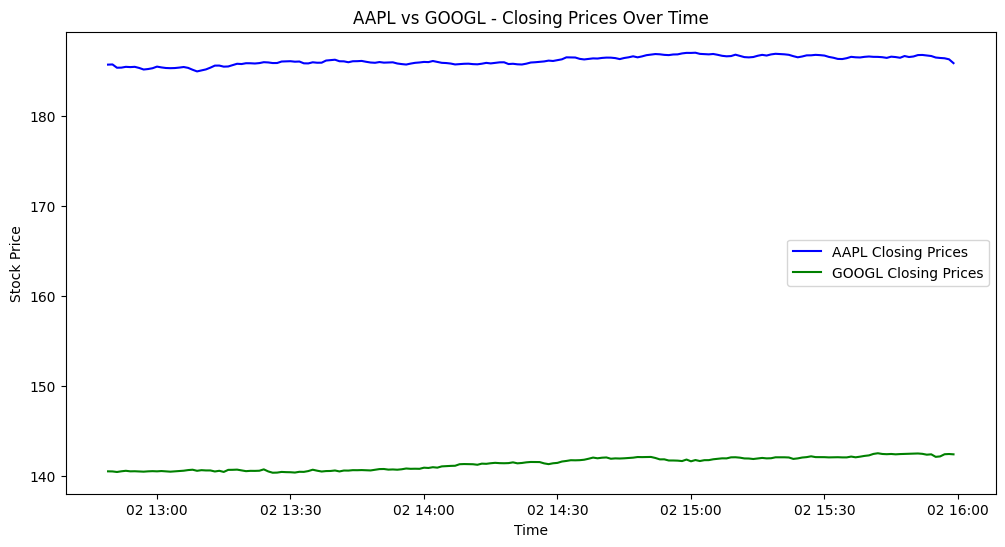

In [10]:
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import time

# Function to fetch real-time stock data from Yahoo Finance
def fetch_real_time_data(symbol):
    data = yf.download(symbol, period="1d", interval="1m")
    return data

# Function to preprocess real-time stock data and create features
def preprocess_real_time_data(data):
    data['SMA_10'] = data['Close'].rolling(window=10).mean()
    data['SMA_50'] = data['Close'].rolling(window=50).mean()
    data['SMA_200'] = data['Close'].rolling(window=200).mean()

    data['SMA_10_vs_50'] = data['SMA_10'] - data['SMA_50']
    data['SMA_10_vs_200'] = data['SMA_10'] - data['SMA_200']

    return data.dropna()

# Function to suggest investment based on real-time model prediction
def suggest_real_time_investment(model, features):
    prediction = model.predict(features)
    return prediction

# Function to train a machine learning model
def train_model(features, target):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    # Create a Random Forest Classifier (you can choose another algorithm)
    model = RandomForestClassifier()

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    predictions = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)

    return model, accuracy

# Function to continuously fetch real-time data and update predictions
def real_time_analysis(symbol, comparison_symbol, duration_minutes):
    end_time = datetime.now() + timedelta(minutes=duration_minutes)

    # Fetch historical data for the comparison symbol
    comparison_data = fetch_real_time_data(comparison_symbol)
    comparison_preprocessed_data = preprocess_real_time_data(comparison_data)

    while datetime.now() < end_time:
        # Fetch real-time stock data
        real_time_data = fetch_real_time_data(symbol)

        # Preprocess data
        preprocessed_data = preprocess_real_time_data(real_time_data)

        if len(preprocessed_data) > 0:
            # Create features
            features = preprocessed_data[['SMA_10_vs_50', 'SMA_10_vs_200']]

            # Suggest real-time investment
            investment_suggestion = suggest_real_time_investment(model, features.tail(1))

            # Print results
            print(f"Investment suggestion for {symbol} at {datetime.now()}: {'Buy' if investment_suggestion[0] == 1 else 'Sell'}")

        # Wait for a minute before fetching new data
        time.sleep(60)

    # Plot comparison graph
    plot_comparison_graph(preprocessed_data, comparison_preprocessed_data, symbol, comparison_symbol)

# Function to plot comparison graph
def plot_comparison_graph(data, comparison_data, symbol, comparison_symbol):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label=f'{symbol} Closing Prices', color='blue')
    plt.plot(comparison_data['Close'], label=f'{comparison_symbol} Closing Prices', color='green')
    plt.title(f'{symbol} vs {comparison_symbol} - Closing Prices Over Time')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Usage
symbol = input("Enter the stock symbol: ")
comparison_symbol = input("Enter the comparison stock symbol: ")
duration_minutes = int(input("Enter the duration in minutes: "))
start_date = '2020-01-01'
end_date = '2023-01-01'

# Fetch historical stock data for training the model
historical_data = fetch_real_time_data(symbol)

# Preprocess data
preprocessed_data = preprocess_real_time_data(historical_data)

# Create features
features = preprocessed_data[['SMA_10_vs_50', 'SMA_10_vs_200']]

# Train machine learning model
target = (preprocessed_data['Close'].shift(-1) > preprocessed_data['Close']).astype(int)
model, accuracy = train_model(features, target)

# Start real-time analysis and plot comparison graph
real_time_analysis(symbol, comparison_symbol, duration_minutes)